In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

set2_colors = plt.get_cmap("Set2").colors
plt.rcParams['pdf.fonttype'] = 42

In [2]:
# root directory where processed mutation data are stored
# if using the zenodo data, this should point to the location of the base zenodo directory (including wes, wgs, etc subfolders)
data_dir = ""

save_plots = False
# directory where you want to save pdf versions of the plots (only use if save_plots = TRUE)
plots_dir = ""

In [3]:
expected_clonal = pd.read_csv(data_dir+"wgs_wes/clonal_noshared_WES_WGS_polycalls.csv", index_col=0)
combined_maf = pd.read_csv(data_dir+"wgs/combined_noshared_FILTERED_muts_WGS.csv")
expected_clonal = expected_clonal[expected_clonal["has_WGS"]]

/share/software/user/open/py-jupyter/1.0.0_py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (82,84,85,87,119) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
expected_clonal["time"] = expected_clonal["exp_clonal"]/36
expected_clonal["time"] = np.maximum(0, expected_clonal["time"]-0.75)

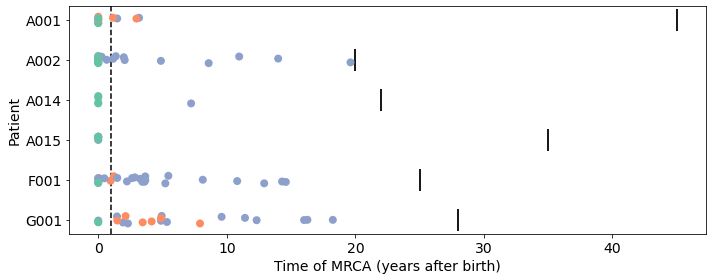

In [5]:
# EXTENDED DATA FIGURE 6a

plt.subplots(1,1,figsize=(10,4))
sns.stripplot(y=expected_clonal["patient"], x=expected_clonal["time"], hue=expected_clonal["stage"], order=["A001", "A002", "A014", "A015", "F001", "G001"], hue_order=["Mucosa", "Benign", "Dysplasia"], s=8, palette="Set2", legend=False)
sns.scatterplot(y=["A001", "A002", "A014", "A015", "F001", "G001"], x=[45, 20, 22, 35, 25, 28], marker="|", s=500, color="k")
plt.axvline(x=1, linestyle="dashed", color="k")
plt.xlabel("Time of MRCA (years after birth)", fontsize=14)
plt.ylabel("Patient", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
if save_plots:
    plt.savefig(plots_dir+"ED6a_patient_MRCA.pdf")
plt.show()

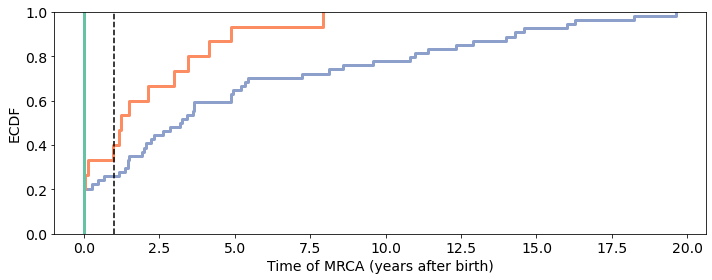

In [6]:
# EXTENDED DATA FIGURE 6b

plt.subplots(1,1,figsize=(10,4))
sns.ecdfplot(data=expected_clonal, x="time", hue=expected_clonal["stage"], hue_order=["Mucosa", "Benign", "Dysplasia"], palette="Set2", linewidth=3, legend=None)
plt.axvline(x=1, linestyle="dashed", color="k")
plt.xlabel("Time of MRCA (years after birth)", fontsize=14)
plt.ylabel("ECDF", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
if save_plots:
    plt.savefig(plots_dir+"ED6b_MRCA_ECDF.pdf")
plt.show()